In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import re
import time
import pandas as pd

In [ ]:
headers = {
    'Referer': 'https://www.rottentomatoes.com/m/notebook/reviews?type=user',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
}

s = requests.Session()

def get_reviews(url):
    r = requests.get(url)
    movie_id = re.findall(r'(?<=movieId":")(.*)(?=","type)',r.text)[0]

    api_url = f"https://www.rottentomatoes.com/napi/movie/{movie_id}/reviews/user" #use reviews/userfor user reviews

    payload = {
        'direction': 'next',
        'endCursor': '',
        'startCursor': '',
    }

    review_data = []
    count = 0
    while True:
        r = s.get(api_url, headers=headers, params=payload)
        data = r.json()

        if not data['pageInfo']['hasNextPage']:
            break

        payload['endCursor'] = data['pageInfo']['endCursor']
        payload['startCursor'] = data['pageInfo']['startCursor'] if data['pageInfo'].get('startCursor') else ''

        review_data.extend(data['reviews'])
        time.sleep(2)
        count = count+1
        if count > 500 :
          break

    return review_data


In [ ]:
#data = get_reviews('https://www.rottentomatoes.com/m/top_gun_maverick/reviews?type=user')
#df = pd.json_normalize(data)

In [ ]:
#df.to_csv('topGunMOveric.csv')

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/topGunMOveric.csv')

In [ ]:
df.head()

,Unnamed: 0,rating,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,timeFromCreation,user.displayName,user.accountLink,user.realm,user.userId,displayImageUrl
0,0,5.0,Hands down the best movie of 2022,ruben,False,False,False,False,5.0,47m ago,ruben,/user/id/Google_105208587126559003207,RT,Google_105208587126559003207,NaN
1,1,5.0,The Best Movie of 2022.,Ahmed R,False,False,False,False,5.0,1h ago,Ahmed R,/user/id/Google_105057991775732297204,RT,Google_105057991775732297204,NaN
2,2,5.0,"Such an amazing movie, amazing story, amazing ...",Colin M,False,False,False,False,5.0,1h ago,Colin M,/user/id/Google_107611028930498126183,RT,Google_107611028930498126183,NaN
3,3,5.0,This was a delight to watch. Saw it four times...,Rodney N,False,False,False,False,5.0,2h ago,Rodney N,/user/id/Google_117595860950713068699,RT,Google_117595860950713068699,NaN
4,4,3.5,It's a good film despite all exposition scenes...,Deinis d,False,False,False,False,3.5,2h ago,Deinis d,/user/id/Google_108295769811905007271,RT,Google_108295769811905007271,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'rating', 'review', 'displayName', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'timeFromCreation', 'user.displayName', 'user.accountLink',
       'user.realm', 'user.userId', 'displayImageUrl'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending = False)

displayImageUrl     4855
user.accountLink    4020
displayName          176
user.displayName     176
Unnamed: 0             0
rating                 0
review                 0
isVerified             0
isSuperReviewer        0
hasSpoilers            0
hasProfanity           0
score                  0
timeFromCreation       0
user.realm             0
user.userId            0
dtype: int64

In [ ]:
df = df.drop(['Unnamed: 0','displayName', 'isVerified', 'isSuperReviewer',
       'hasSpoilers', 'hasProfanity', 'score', 'timeFromCreation',
       'user.displayName', 'user.accountLink', 'user.realm', 'user.userId',
       'displayImageUrl'],axis = 1)

In [ ]:
df.head()

,rating,review
0,5.0,Hands down the best movie of 2022
1,5.0,The Best Movie of 2022.
2,5.0,"Such an amazing movie, amazing story, amazing ..."
3,5.0,This was a delight to watch. Saw it four times...
4,3.5,It's a good film despite all exposition scenes...


In [ ]:
df.rating.value_counts()

5.0    4070
4.5     373
4.0     279
3.5     100
3.0      71
0.5      33
2.5      26
2.0      26
1.0      21
1.5      11
Name: rating, dtype: int64

In [ ]:
import numpy as np

In [ ]:
df['sentiment']=np.where(df['rating'] >3, 'Positive','Negative')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review sentiment')

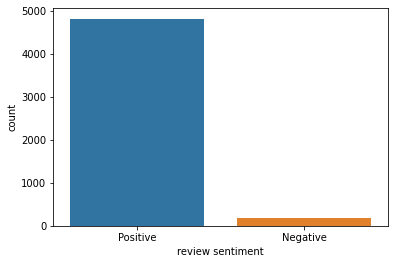

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')

In [ ]:
df.head()

,rating,review,sentiment
0,5.0,Hands down the best movie of 2022,Positive
1,5.0,The Best Movie of 2022.,Positive
2,5.0,"Such an amazing movie, amazing story, amazing ...",Positive
3,5.0,This was a delight to watch. Saw it four times...,Positive
4,3.5,It's a good film despite all exposition scenes...,Positive


In [ ]:
df.sentiment.value_counts()

Positive    4822
Negative     188
Name: sentiment, dtype: int64

In [ ]:
df = df.drop(['rating'],axis =1)

In [ ]:
df.head()

,review,sentiment
0,Hands down the best movie of 2022,Positive
1,The Best Movie of 2022.,Positive
2,"Such an amazing movie, amazing story, amazing ...",Positive
3,This was a delight to watch. Saw it four times...,Positive
4,It's a good film despite all exposition scenes...,Positive


#review preprocessing
- removal of special character
- upper to lower case
- stopwords
- decontraction of the word
- removal of emojis
- double white space handling
- lemmatization


In [ ]:
# removal of special characters and emojis
special_char = ['"','*','/','(',')',':','\n','.','!',',','?','😘','👀','😄','☹️','😢','🤣','😀','😉','💖','🤭','😁','🥰','🙌🏽','🤷🏻‍♀️','😬','😃','👏','😂','✈️','✈','👌','😎','📽','💜','🍅','🍿','❣️','🤩','😍','🤌🏻',' 🏽🏽','☄️','😖','😆','🌸','🦇','👍','🎬','🔥','👍🏻','😳','🙊','❤️','♥️','🎥','😉','⭐','😫','👍🏾','👏🏽','S🏼🏼🏼🏼🏼🏼🏼🏼',' 🏻🏻🏻']
special_char_removed = list(map(re.escape, special_char))

In [ ]:
df['review']=df['review'].replace(special_char_removed,'',regex=True)

In [ ]:
# remove white spaces
df['review'] = df['review'].str.strip()

In [ ]:
import nltk
import warnings
warnings.filterwarnings("ignore")


In [ ]:
def remove_accented_chars_func(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [ ]:
def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [ ]:
def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [ ]:
def remove_extra_whitespaces_func(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [ ]:
def word_count_func(text):
    return len(text.split())

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.1 MB/s 
     |████████████████████████████████| 106 kB 55.2 MB/s 


In [ ]:
import contractions
def contraction_func(text):
  return  contractions.fix(text)

In [ ]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples
nltk.download('punkt')
nltk.download('corpus')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [ ]:
df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(remove_punctuation_func)
df['review'] = df['review'].apply(remove_irr_char_func)
df['review'] = df['review'].apply(remove_extra_whitespaces_func)
df['review'] = df['review'].apply(contraction_func)

In [ ]:
#tokenized the text
from nltk.tokenize import word_tokenize
df['clean_review'] = [word_tokenize(doc) for doc in df.review]

In [ ]:
#removing of stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
df['clean_review'] = df['clean_review'].apply(remove_stopwords)


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
#from nltk.stem.porter import PorterStemmer
#from nltk.stem.wordnet import WordNetLemmatizer
#porter_stemmer = PorterStemmer()
#def stemming(text):
 #     stem_text = [porter_stemmer.stem(word) for word in text]
  #    return stem_text


In [ ]:
#df['clean_review']=df['clean_review'].apply(lambda x: stemming(x))

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text


In [ ]:
df['clean_review'] = df['clean_review'].apply(lambda x:lemmatizer(x))

In [ ]:
for i in df['clean_review']:
  print(i)

Streaming output truncated to the last 5000 lines.
['awesomejesus', 'love']
['plot', 'simple', 'feel', 'good', 'action', 'movie', 'whole', 'cast', 'acted', 'passionately', 'though', 'started', 'like', 'old', 'hentai', 'music', 'hear', 'spa', 'brief', 'setup', 'really', 'enjoyed', 'movie', 'leave', 'feeling', 'good', 'maybe', 'inspired']
['best', 'blockbuster', 'ever']
['loved', 'similar', 'original', 'still', 'different', 'another', 'remake']
['expected', 'part', 'ii', 'le', 'first', 'top', 'gun', 'soooo', 'wrong', 'great', 'follow', 'would', 'definitely', 'see']
['one', 'tom', 'best', 'movie']
['without', 'context', 'whoa', 'wow', 'bob']
['lifetime', 'movie']
['best', 'movie', 'seen', 'year', 'edge', 'seat', 'last', 'minute', 'wait', 'see', 'must', 'watch']
['definitely', 'one', 'watch', 'movie', 'game', 'changer']
['outstanding', 'achievement', 'filmmaking', 'acting', 'producing', 'artwork', 'movie', 'absolute', 'masterpiece', 'sequal', 'original', 'classic', 'top', 'gun', 'staggerin

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

(-0.5, 999.5, 499.5, -0.5)

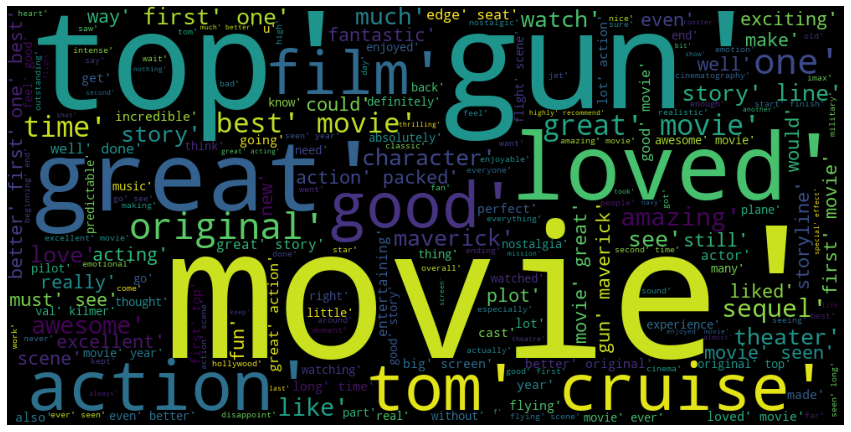

In [ ]:

cloud =WordCloud(width = 1000, height = 500).generate(' '.join(map(str,df['clean_review'])))
plt.figure(figsize = (15,8))
plt.imshow(cloud)
plt.axis('off')


In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


In [ ]:
from collections import defaultdict

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df[df.sentiment=="Positive"].review:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['hands', 'best', 'movie']
Sentence after removing stopwords: ['best', 'movie']
Sentence after removing stopwords: ['amazing', 'movie', 'amazing', 'story', 'amazing', 'characters', 'amazing', 'experience', 'theatre', 'would', 'release', 'double', 'top', 'gun', 'screening', 'short', 'intermission', 'would', 'turn', 'whole', 'family', 'affair']
Sentence after removing stopwords: ['delight', 'watch', 'saw', 'four', 'times', 'theater', 'pays', 'homage', 'original', 'giving', 'us', 'new', 'cast', 'cheer', 'care', 'one', 'flies', 'high']
Sentence after removing stopwords: ['good', 'film', 'despite', 'exposition', 'scenes', 'made', 'crazy']
Sentence after removing stopwords: ['love', 'much', 'sequel', 'right', 'way']
Sentence after removing stopwords: ['great', 'entertainment', 'saw', 'twice', 'theater', 'round', 'product', 'everything', 'falls', 'place', 'enjoy', 'every', 'minute', 'action', 'plot', 'romance', 'photography', 'satisfying', 'ending', 'must', 

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df[df.sentiment=="Negative"].review:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['liked', 'tomahawk', 'missiles', 'flying', 'low', 'flying', 'fighter', 'jets', 'enjoyed', 'seeing', 'tom', 'cruise', 'actually', 'fly', 'carrier', 'shipgood', 'action', 'scenes', 'jet']
Sentence after removing stopwords: ['seen', 'original', 'atleast', 'times', 'times', 'still', 'theaters', 'know', 'expect', 'coming', 'seeing', 'maverick', 'well', 'great', 'thought', 'might', 'bedidn', 'seem', 'energy', 'original', 'huge', 'military', 'buff', 'pretty', 'familiar', 'military', 'would', 'handle', 'things', 'missions', 'etc', 'storyline', 'seemed', 'meh', 'seem', 'plausiblei', 'know', 'movie', 'made', 'story', 'military', 'would', 'never', 'mission', 'like', 'fa', 'would', 'mission', 'using', 'b', 'honestly', 'even', 'original', 'iron', 'eagle', 'blows', 'top', 'gun', 'maverick', 'window', 'pretty', 'sure', 'never', 'watch', 'one', 'many', 'times', 'original', 'left', 'original', 'instead', 'trying', 'whatever', 'think', 'one']
Sentence after removing s

In [ ]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))


In [ ]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [ ]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

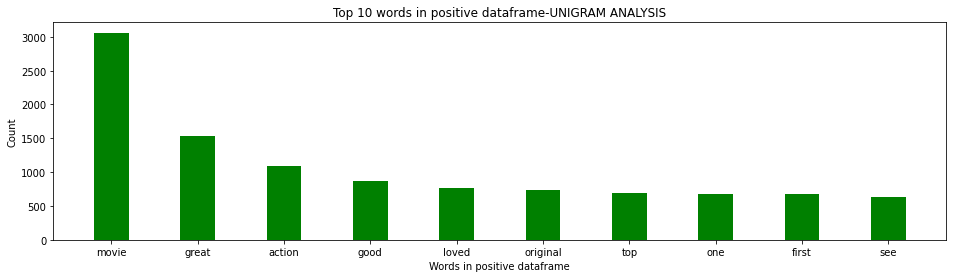

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("Positive-unigram.png")
plt.show()

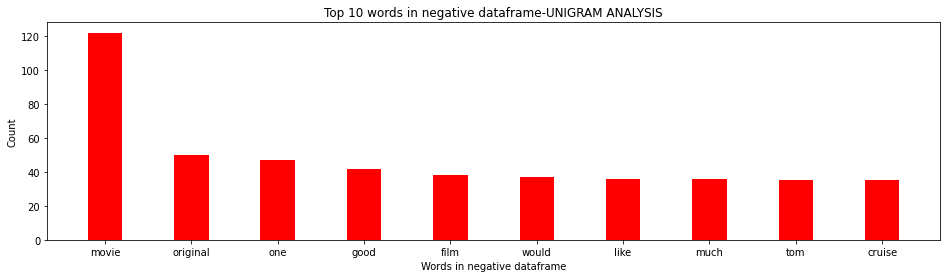

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

In [ ]:
df['sentiment']=df['sentiment'].replace(['Positive'],'1')
df['sentiment']=df['sentiment'].replace(['Negative'],'0')

In [ ]:
df['clean_review']

0                                     [hand, best, movie]
1                                           [best, movie]
2       [amazing, movie, amazing, story, amazing, char...
3       [delight, watch, saw, four, time, theater, pay...
4       [good, film, despite, exposition, scene, made,...
                              ...                        
5005    [best, movie, seen, since, avenger, infinity, ...
5006    [admit, enjoyed, first, film, watched, recentl...
5007    [exciting, watch, also, great, sequel, origina...
5008    [loved, watched, first, one, would, intensity,...
5009                                  [absolutely, loved]
Name: clean_review, Length: 5010, dtype: object

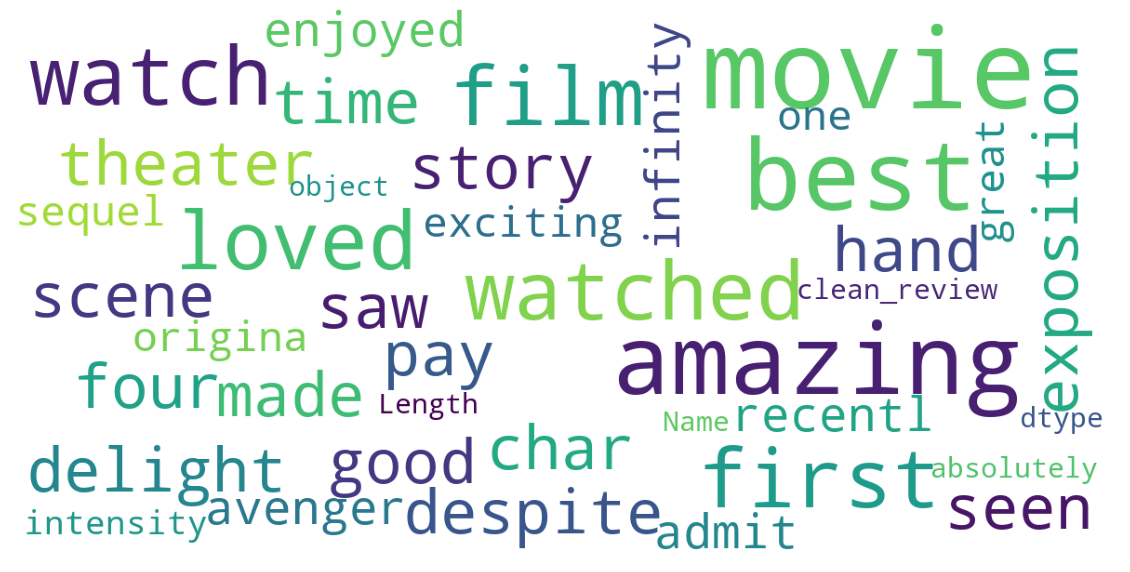

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["clean_review"])

In [ ]:
df['clean_review']=df['clean_review'].apply(str)

**TfidVectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase = False)
tfidf_result = tfidf.fit_transform(df["clean_review"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())



In [ ]:
tfidf_df

,aaaaaalways,abandoned,abc,aber,abercrombie,ability,able,abound,abrupt,absence,...,yourselfrip,youth,youtube,youtubes,yr,zero,zimmer,zone,zoom,zoomed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = tfidf_df
y = df['sentiment']

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y.ravel())
counter = Counter(y)
print(counter)

Counter({'1': 4822, '0': 4822})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)
features = [c for c in tfidf_df.columns ]

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X.shape

(9644, 6037)

In [ ]:
y.shape

(9644,)

**DecisionTree classifier**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X_train, y_train)
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)
print("Test data Accuracy is :",accuracy_score(y_test , pred))
print(classification_report(y_test, pred))



Test data Accuracy is : 0.9517884914463453
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       0.97      0.93      0.95       974

    accuracy                           0.95      1929
   macro avg       0.95      0.95      0.95      1929
weighted avg       0.95      0.95      0.95      1929



**LGB**

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(max_depth=20,
                         n_estimators=25,
                         min_child_weight=0.0016,
                         n_jobs=-1)
model = clf.fit(X_train, y_train)
pred_prob =model.predict_proba(X_test)
pred = model.predict(X_test)
print("Test data Accuracy is :",accuracy_score(y_test , pred))
print(classification_report(y_test, pred))


Test data Accuracy is : 0.9523068947641264
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       955
           1       0.94      0.96      0.95       974

    accuracy                           0.95      1929
   macro avg       0.95      0.95      0.95      1929
weighted avg       0.95      0.95      0.95      1929



**RandomForest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)
pred_prob = rf_model.predict_proba(X_test)
pred = rf_model.predict(X_test)
print("Test data Accuracy is :",accuracy_score(y_test , pred))
print(classification_report(y_test, pred))



Test data Accuracy is : 0.9917055469155003
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       1.00      0.99      0.99       974

    accuracy                           0.99      1929
   macro avg       0.99      0.99      0.99      1929
weighted avg       0.99      0.99      0.99      1929



**logistict regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(solver="liblinear")
lg_model.fit(X_train, y_train)
pred_prob = lg_model.predict_proba(X_test)
pred = lg_model.predict(X_test)
print("Test data Accuracy is :",accuracy_score(y_test , pred))
print(classification_report(y_test, pred))


Test data Accuracy is : 0.9626749611197511
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       955
           1       0.99      0.93      0.96       974

    accuracy                           0.96      1929
   macro avg       0.96      0.96      0.96      1929
weighted avg       0.96      0.96      0.96      1929



**Naive bayes classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train, y_train).predict(X_test)
pred_prob = naive_model.predict_proba(X_test)
pred = naive_model.predict(X_test)
print("Test data Accuracy is :",accuracy_score(y_test , pred))
print(classification_report(y_test, pred))


Test data Accuracy is : 0.8113011923276309
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       955
           1       1.00      0.63      0.77       974

    accuracy                           0.81      1929
   macro avg       0.86      0.81      0.81      1929
weighted avg       0.86      0.81      0.80      1929



**Gradient boosing classifier**

In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier
 gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
 gb_model.fit(X_train, y_train)
 pred_prob = gb_model.predict_proba(X_test)
pred = gb_model.predict(X_test)
print("Test data Accuracy is :",accuracy_score(y_test , pred))
print(classification_report(y_test, pred))


Test data Accuracy is : 0.9590461378952825
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       955
           1       0.96      0.95      0.96       974

    accuracy                           0.96      1929
   macro avg       0.96      0.96      0.96      1929
weighted avg       0.96      0.96      0.96      1929



**XG boost classifier**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
pred_prob = xgb_model.predict_proba(X_test)
pred = gb_model.predict(X_test)
print("Test data Accuracy is :",accuracy_score(y_test , pred))
print(classification_report(y_test, pred))


Test data Accuracy is : 0.9590461378952825
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       955
           1       0.96      0.95      0.96       974

    accuracy                           0.96      1929
   macro avg       0.96      0.96      0.96      1929
weighted avg       0.96      0.96      0.96      1929



In [ ]:
!pip install streamlit

In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')